<a href="https://colab.research.google.com/github/Shri-Aiswarya/NLP/blob/main/NLP____10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the imdb-reviews_2.csv file.

• Load the data

• Count the number of positive and negative sentiment

• Clean the text ‘review’ and create a column called ‘review_processed’

• Replace short words as
df['review_processed'] = df['review_processed'].apply(lambda x:
' '.join([w for w in x.split() if len(w)>2]))

• Make entire text lowercase

• Remove stopwords

• Make custom list of words to be removed including ‘movie’, ‘film’, ‘one’, ‘make’,
and ‘even’

• Add to the list of words

• Lemmatize the text

• Convert NLTK tags into ‘wordnet’ tags

• Find the part of speech tag

• Lemmatize sentences using POS. Tokenize the sentence and find POS tag for
each token

• Define ‘wordnet_tagged.’ If there is no available tag, append the token as is.
Else, use the tag to lemmatize the token

• Plot the most frequent words from positive reviews using bar chart. Subset
positive review dataset, extract words into list and count frequency. Subset top
30 words by frequency in a horizontal bar chart

• Create a word cloud

• Import CountVectorizer and create a sparse matrix of 2,500 tokens. Split the data
set into train and test (20%) set

• Use the GaussianNB to train the model on the training data. Provide the
accuracy of the model

• Test the model on the test set

• Create the confusion matrix and classification report

• Use Seaborn heatmap to show TP, FP, TN, FN values

• Use a logistic regression model and check the accuracy of the model for C=0.01,
0.05, 0.5, 0.5, and 1.

• Provide the ROC curve. What is the area under the curve?

In [1]:
#Importing the necessary libraries
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter
import matplotlib.pyplot as plt
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

#Loading the dataset
df = pd.read_csv("imdb-reviews_2.csv")
print(df.head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


                                              review  label
0  first think another Disney movie, might good, ...      1
1  Put aside Dr. House repeat missed, Desperate H...      0
2  big fan Stephen King's work, film made even gr...      1
3  watched horrid thing TV. Needless say one movi...      0
4  truly enjoyed film. acting terrific plot. Jeff...      1


In [25]:
#Displaying the count of each sentiment label(positive, negative)
sentiment_counts = df['label'].value_counts()
print(sentiment_counts)

#Downloading necessary NLTK resources
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
nltk.download("punkt")

#Initializing the lemmatizer and set of stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))
custom_stopwords = {"movie", "film", "one", "make", "even"}
stop_words.update(custom_stopwords)

#Text cleaning - removing special characters and non-alphabetic characters
df["review_processed"] = df["review"].str.replace(r"[^a-zA-Z\s]", "", regex=True)
df["review_processed"] = df["review_processed"].str.lower()
print(df["review_processed"].head())

#Filtering out words with length <= 2
df["review_processed"] = df["review_processed"].apply(
    lambda x: " ".join([word for word in x.split() if len(word) > 2])
)
print(df["review_processed"].head())

#Removal of stopwords
df["review_processed"] = df["review_processed"].apply(
    lambda x: " ".join([word for word in x.split() if word not in stop_words])
)
print(df["review_processed"].head())


label
1    2528
0    2472
Name: count, dtype: int64
0    first think another disney movie might good it...
1    put aside dr house repeat missed desperate hou...
2    big fan stephen kings work film made even grea...
3    watched horrid thing tv needless say one movie...
4    truly enjoyed film acting terrific plot jeff c...
Name: review_processed, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    first think another disney movie might good it...
1    put aside house repeat missed desperate housew...
2    big fan stephen kings work film made even grea...
3    watched horrid thing needless say one movies w...
4    truly enjoyed film acting terrific plot jeff c...
Name: review_processed, dtype: object
0    first think another disney might good kids wat...
1    put aside house repeat missed desperate housew...
2    big fan stephen kings work made greater fan ki...
3    watched horrid thing needless say movies watch...
4    truly enjoyed acting terrific plot jeff combs ...
Name: review_processed, dtype: object


In [37]:
#Lemmatization
lemmatized_reviews = []
for review in df["review_processed"]:
    tokens = nltk.word_tokenize(review)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_reviews.append(" ".join(lemmatized_tokens))
df["review_processed"] = lemmatized_reviews
print(df["review_processed"].head())

#Lemmatization with pos tagging
def convert_pos_to_wordnet(tag):
    if tag.startswith("J"):
        return wordnet.ADJ
    elif tag.startswith("V"):
        return wordnet.VERB
    elif tag.startswith("N"):
        return wordnet.NOUN
    elif tag.startswith("R"):
        return wordnet.ADV
    else:
        return None

lemmatized_texts = []

for review_text in df["review_processed"]:
    tokens = nltk.word_tokenize(review_text)
    pos_tagged = nltk.pos_tag(tokens)
    lemmatized_words = []

    for word, pos_tag in pos_tagged:
        wordnet_tag = convert_pos_to_wordnet(pos_tag)
        if wordnet_tag:
            lemmatized_word = lemmatizer.lemmatize(word, wordnet_tag)
        else:
            lemmatized_word = lemmatizer.lemmatize(word)
        lemmatized_words.append(lemmatized_word)

    lemmatized_texts.append(" ".join(lemmatized_words))

df["review_processed"] = lemmatized_texts
print(df["review_processed"].head())

0    first think another disney might good kid watc...
1    put aside house repeat missed desperate housew...
2    big fan stephen king work made greater fan kin...
3    watched horrid thing needless say movie watch ...
4    truly enjoyed acting terrific plot jeff comb t...
Name: review_processed, dtype: object
0    first think another disney might good kid watc...
1    put aside house repeat miss desperate housewif...
2    big fan stephen king work make great fan king ...
3    watch horrid thing needless say movie watch se...
4    truly enjoyed act terrific plot jeff comb tale...
Name: review_processed, dtype: object


<ipython-input-38-5ba902b658a4>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequencies), y=list(words), palette='viridis')


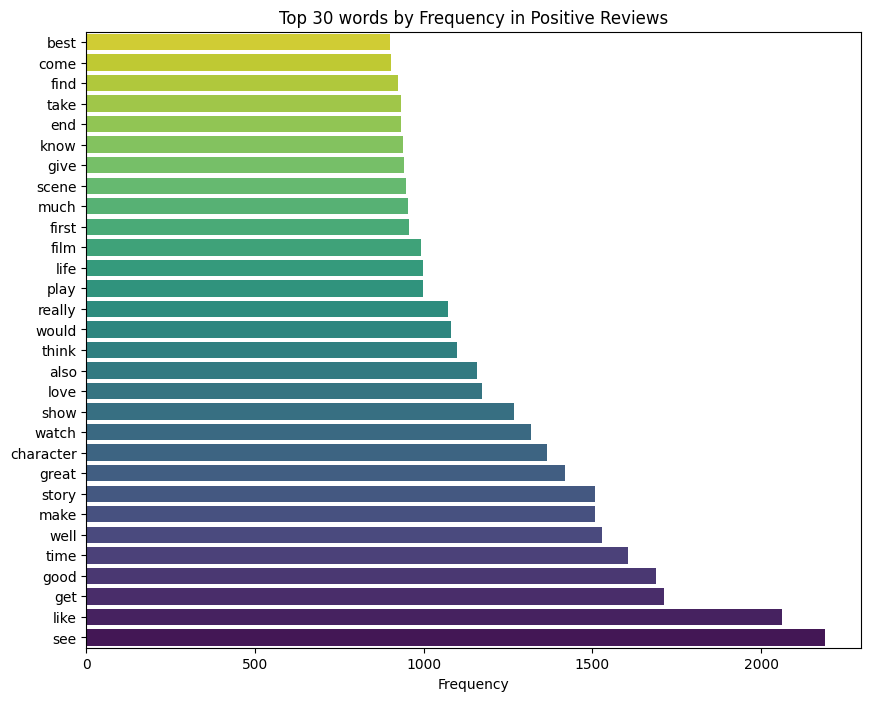

In [38]:
#Filtering out positive reviews based on label
positive_reviews = df[df["label"] == 1]["review_processed"]

#Combining all positive reviews into single text and split into individual words
words_in_positive_reviews = " ".join(positive_reviews).split()

word_frequency = Counter(words_in_positive_reviews)

#Selecting 30 most common words from the frequency
top_30_words = word_frequency.most_common(30)
words, frequencies = zip(*top_30_words)

#Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=list(frequencies), y=list(words), palette='viridis')
plt.xlabel("Frequency")
plt.title("Top 30 words by Frequency in Positive Reviews")
plt.gca().invert_yaxis()
plt.show()


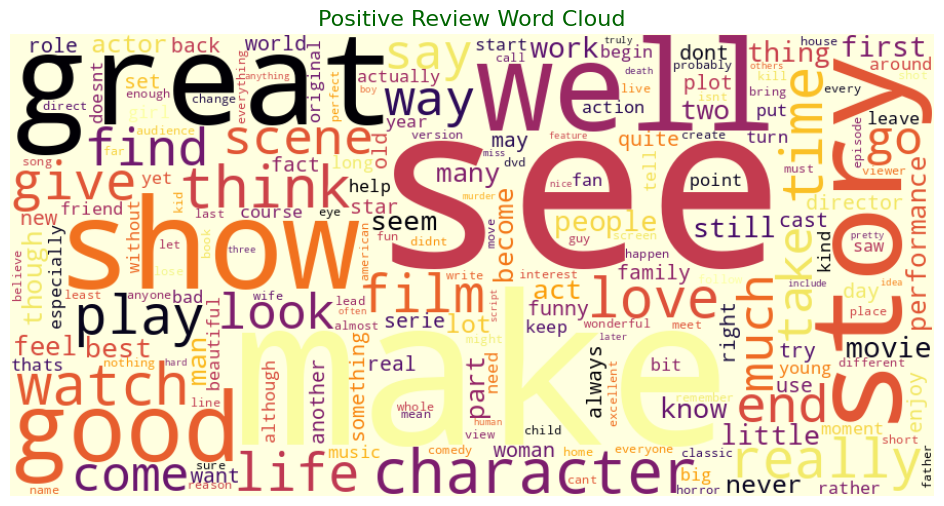

In [15]:
wordcloud_instance = WordCloud(
    width=900,  # Changed the width
    height=450,  # Changed the height
    background_color="lightyellow",  # Changed the background color
    colormap="inferno"  # Changed the colormap
).generate(" ".join(words_in_positive_reviews))

#Displaying the word cloud
plt.figure(figsize=(12, 6))  # Adjusted figure size
plt.imshow(wordcloud_instance, interpolation="bilinear")
plt.axis("off")  # Disable the axis
plt.title("Positive Review Word Cloud", fontsize=16, color="darkgreen")  # Adjusted title and color
plt.show()

Model Accuracy: 0.7020
True Positives (TP): 304
False Positives (FP): 81
True Negatives (TN): 398
False Negatives (FN): 217


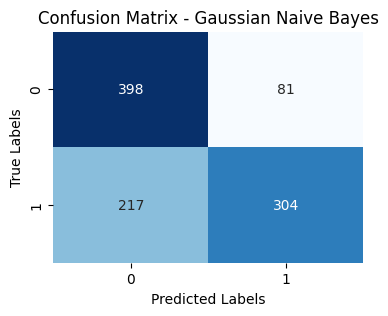

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.83      0.73       479
           1       0.79      0.58      0.67       521

    accuracy                           0.70      1000
   macro avg       0.72      0.71      0.70      1000
weighted avg       0.72      0.70      0.70      1000



In [41]:
#Creating a bag-of-words representation using CountVectorizer
vectorizer = CountVectorizer(max_features=2500)
X_features = vectorizer.fit_transform(df["review_processed"]).toarray()  # Renamed the processed review column
y_labels = df["label"]  # Renamed the target column

#Splitting the dataset into training (80%) and testing (20%) sets
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_features, y_labels, test_size=0.2, random_state=42)

#Training the Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_set, y_train_set)

#Predicting sentiment on the test set
y_pred_naive_bayes = naive_bayes_model.predict(X_test_set)

#Evaluating model performance
accuracy = accuracy_score(y_test_set, y_pred_naive_bayes)
conf_matrix = confusion_matrix(y_test_set, y_pred_naive_bayes)
class_report = classification_report(y_test_set, y_pred_naive_bayes)

#Displaying the accuracy
print(f"Model Accuracy: {accuracy:.4f}")

#Printing the values for the confusion matrix
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")


#Plotting the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)  # Changed color map to 'Blues'
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#Printing the classification report for deeper analysis
print("Classification Report:")
print(class_report)

Logistic Regression Accuracy for different regularization values:
Regularization Value (C = 0.01): Accuracy = 0.85
Regularization Value (C = 0.05): Accuracy = 0.84
Regularization Value (C = 0.1): Accuracy = 0.84
Regularization Value (C = 0.5): Accuracy = 0.83
Regularization Value (C = 1.0): Accuracy = 0.82


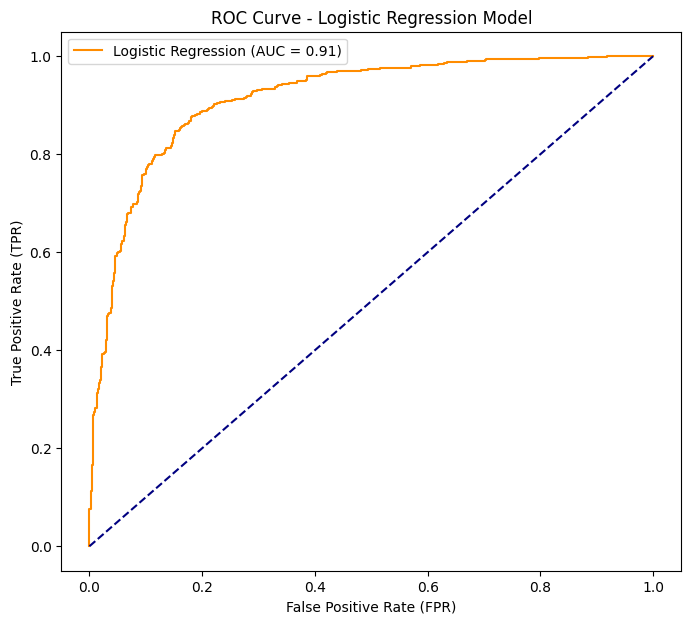

Area Under the Curve (AUC) for Logistic Regression: 0.91


In [39]:
#Defining a range of regularization values
c_values = [0.01, 0.05, 0.1, 0.5, 1.0]
logistic_results = {}

for c in c_values:
    logistic_model = LogisticRegression(C=c, max_iter=1000)
    logistic_model.fit(X_train, y_train)
    predictions_logistic = logistic_model.predict(X_test)
    accuracy_logistic = accuracy_score(y_test, predictions_logistic)
    logistic_results[c] = accuracy_logistic

#Displaying the results
print("Logistic Regression Accuracy for different regularization values:")
for c, accuracy in logistic_results.items():
    print(f"Regularization Value (C = {c}): Accuracy = {accuracy:.2f}")

#Identifying which is the best-performing model for C = 0.05 based on the results
best_log_reg = LogisticRegression(C=0.05, max_iter=1000)
best_log_reg.fit(X_train, y_train)
y_prob_log_reg = best_log_reg.predict_proba(X_test)[:, 1]

#Calculating of ROC curve and AUC for the best logistic model
fpr, tpr, _ = roc_curve(y_test, y_prob_log_reg)
roc_auc = auc(fpr, tpr)

#Plotting the ROC curve to visualize performance
plt.figure(figsize=(8, 7))
plt.plot(fpr, tpr, color='darkorange', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Logistic Regression Model')
plt.legend()
plt.show()
print(f"Area Under the Curve (AUC) for Logistic Regression: {roc_auc:.2f}")